In [1]:
# summary
# 웹서비스의 구조
# 웹페이지의 종류
# - 동적페이지 : URL 변경 X > 데이터 수정 : JSON : API
# - 정적페이지 : URL 변경 O > 데이터 수정 : HTML : css selector > BeatufulSoup : select(), select_one()

In [3]:
# html : 웹페이지에서 레이아웃, 텍스트 등의 데이터를 작성
# 구성요소 : document, element, tag, attr, text
# element 계층적 구조
# tag 종류 : p, span, ul, li, table, a, img, iframe, div

In [4]:
# css selector : html의 element에 style을 적용시킬때 element를 선택하는 방법
# element 선택 : tag(span), class(.), id(#), attr([value="no1"])
# n번째 element 선택 : .py:nth-child(2) : nth-child(2) > .py : 2번째 엘리먼트중에 클래스가 py 인 엘리먼트
# 계층적 element 선택 : 모든 하위 엘리먼트 선택(.wrap p), 한단계 하위 엘리먼트 선택(.wrap > p), 여러개 선택(.no1, .no2)

In [5]:
%ls

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\Desktop\python_crawling\day3\code 디렉터리

2022-08-05  오전 09:58    <DIR>          .
2022-08-05  오전 09:58    <DIR>          ..
2022-08-05  오전 09:41    <DIR>          .ipynb_checkpoints
2022-08-05  오전 09:56             3,476 01_crawling_images.ipynb
2022-08-05  오전 09:58            31,275 gmarket.csv
               2개 파일              34,751 바이트
               3개 디렉터리  377,770,102,784 바이트 남음


In [6]:
import pandas as pd
import requests, os

In [7]:
# 1. 디렉토리 생성 : data

In [12]:
path = "data"
if not os.path.exists(path): # 디렉토리 존재 유무 확인
    os.makedirs(path)

In [8]:
# 2. csv 파일을 로드 : image link

In [14]:
df = pd.read_csv("gmarket.csv")
df.tail(2)

title  o_price  s_price  \
198  [미래생활]순수PURE천연펄프 25m 30롤 x 3팩 휴지  31,900원  28,900원   
199            탑모델 여름신상 BEST 특가+10%쿠폰  32,900원   9,900원   

                                                   img  
198  http://gdimg.gmarket.co.kr/1899274105/still/30...  
199  http://gdimg.gmarket.co.kr/1787483503/still/30...

In [16]:
img_link = df.loc[0, "img"]
img_link

'http://gdimg.gmarket.co.kr/2266434001/still/300?ver=2022080509'

In [10]:
# 3. download images : requests

In [17]:
response = requests.get(img_link)
response

<Response [200]>

In [19]:
with open(f"{path}/test.png", "wb") as file:
    file.write(response.content)

In [20]:
%ls data

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\Desktop\python_crawling\day3\code\data 디렉터리

2022-08-05  오전 10:11    <DIR>          .
2022-08-05  오전 10:11    <DIR>          ..
2022-08-05  오전 10:11            20,611 test.png
               1개 파일              20,611 바이트
               2개 디렉터리  377,767,006,208 바이트 남음


In [21]:
# 4. display image : pillow

In [22]:
from PIL import Image as pil

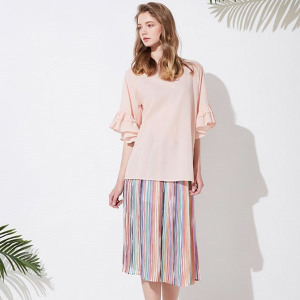

In [23]:
pil.open(f"{path}/test.png")

In [24]:
# 5. 여러개의 이미지 다운로드

In [27]:
df[:3]

title  o_price  s_price  \
0  3900원 균일가 시즌오프 블라우스/티셔츠/원피스/팬츠 外  13,000원   3,900원   
1                    청정우 양지 300gX3팩  31,800원  15,900원   
2    [한상궁김치]한상궁김치 국산 겉절이 2kg 출고당일생산      NaN  15,900원   

                                                 img  
0  http://gdimg.gmarket.co.kr/2266434001/still/30...  
1  http://gdimg.gmarket.co.kr/1587075039/still/30...  
2  http://gdimg.gmarket.co.kr/1798110680/still/30...

In [30]:
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx) + ".png"
    print(idx, filename, data["img"])
    response = requests.get(data["img"])
    with open(f"{path}/{filename}", "wb") as file:
        file.write(response.content)

0 000.png http://gdimg.gmarket.co.kr/2266434001/still/300?ver=2022080509
1 001.png http://gdimg.gmarket.co.kr/1587075039/still/300?ver=2022080509
2 002.png http://gdimg.gmarket.co.kr/1798110680/still/300?ver=2022080509
3 003.png http://gdimg.gmarket.co.kr/336394693/still/300?ver=2022080509
4 004.png http://gdimg.gmarket.co.kr/2514963907/still/300?ver=2022080509


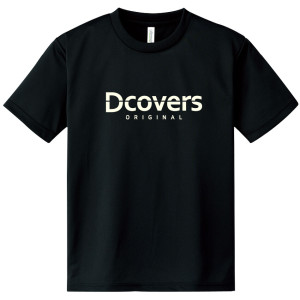

In [32]:
pil.open(f"{path}/004.png")

In [31]:
%ls data

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\Desktop\python_crawling\day3\code\data 디렉터리

2022-08-05  오전 10:20    <DIR>          .
2022-08-05  오전 10:20    <DIR>          ..
2022-08-05  오전 10:20            20,611 000.png
2022-08-05  오전 10:20            37,945 001.png
2022-08-05  오전 10:20            36,219 002.png
2022-08-05  오전 10:20            34,207 003.png
2022-08-05  오전 10:20            13,381 004.png
2022-08-05  오전 10:11            20,611 test.png
               6개 파일             162,974 바이트
               2개 디렉터리  377,768,484,864 바이트 남음


In [33]:
# setting startup file

In [34]:
# 1. make ipython profile : os

In [36]:
!ipython profile create

In [35]:
# 2. make .py file in startup directory

In [37]:
!dir C:\Users\User\.ipython

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\.ipython 디렉터리

2022-01-19  오전 09:09    <DIR>          .
2022-01-19  오전 09:09    <DIR>          ..
2022-01-19  오전 09:09    <DIR>          extensions
2022-01-19  오전 09:09    <DIR>          nbextensions
2022-08-05  오전 10:49    <DIR>          profile_default
               0개 파일                   0 바이트
               5개 디렉터리  377,766,477,824 바이트 남음


In [ ]:
!ls ~/.ipython

In [38]:
!dir C:\Users\User\.ipython\profile_default\startup

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\.ipython\profile_default\startup 디렉터리

2022-08-04  오후 04:34    <DIR>          .
2022-08-04  오후 04:34    <DIR>          ..
2022-08-04  오후 04:34                41 00-first.py
2022-01-19  오전 09:09               371 README
               2개 파일                 412 바이트
               2개 디렉터리  377,766,645,760 바이트 남음


In [ ]:
# %load C:\Users\User\.ipython\profile_default\startup\README
This is the IPython startup directory

.py and .ipy files in this directory will be run *prior* to any code or files specified
via the exec_lines or exec_files configurables whenever you load this profile.

Files will be run in lexicographical order, so you can control the execution order of files
with a prefix, e.g.::

    00-first.py
    50-middle.py
    99-last.ipy


In [42]:
%%writefile C:\Users\User\.ipython\profile_default\startup\00-first.py
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

Overwriting C:\Users\User\.ipython\profile_default\startup\00-first.py


In [ ]:
# %load C:\Users\User\.ipython\profile_default\startup\00-first.py
import pandas as pd
import numpy as np
import requests